#            Stock Prediction of Amazon using LSTM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import LSTM,Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [2]:
#reading data
data=pd.read_csv("AMZN.csv")

In [3]:
data.drop("Volume",axis=1,inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1257 non-null   object 
 1   Open       1257 non-null   float64
 2   High       1257 non-null   float64
 3   Low        1257 non-null   float64
 4   Close      1257 non-null   float64
 5   Adj Close  1257 non-null   float64
dtypes: float64(5), object(1)
memory usage: 59.0+ KB


In [5]:
data.set_index("Date",drop=True,inplace=True)

In [6]:
df=[]
for i in range(0,5):
    df.append(data.iloc[:,i:i+1])

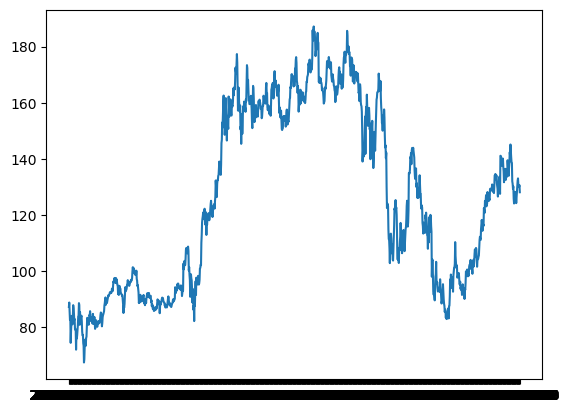

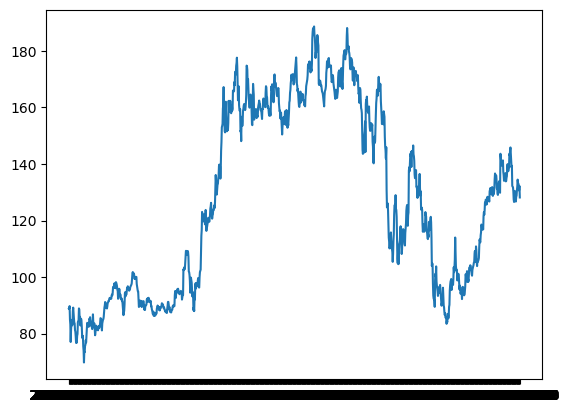

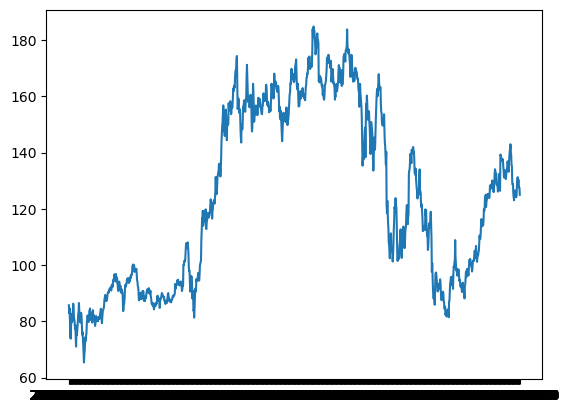

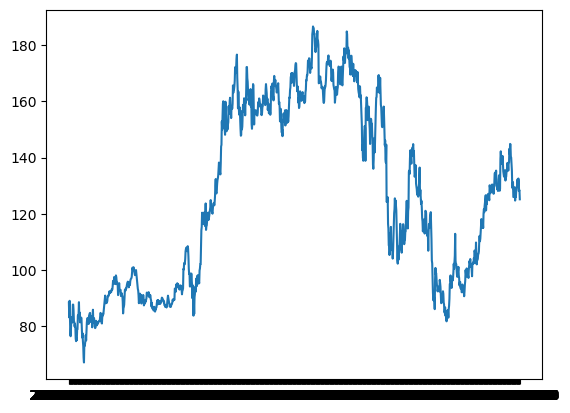

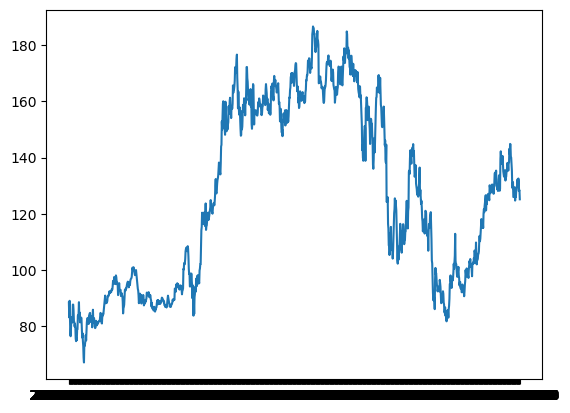

In [7]:
#plotting data individually for each feature
for i in range(0,5):
    plt.plot(df[i])
    plt.show()


* Preprocessing of data

In [8]:
#calculating percentage change
for i in range(0,5):
    t=df[i].copy()
    t["returns"]=t.iloc[:,0].pct_change()
    df[i]=t

In [9]:
for i in range(0,5):
    df[i].dropna(inplace=True)

In [10]:
for i in range(0,5):
    df[i]["log_returns"]=np.log(1+df[i]['returns'])

In [11]:
X=[]
for i in range(0,5):
    Z=df[i].iloc[:,0]
    Y=df[i].iloc[:,2]
    X.append(np.column_stack((Z,Y)))

In [12]:
# normalization of data
scaled_data=[]
for i in range(0,5):
    scaler=MinMaxScaler(feature_range=(0,1)).fit(X[0])
    scaled_data.append(scaler.transform(X[0]))
   

In [13]:
Y=[]
for i in range(0,5):
    T=[]
    for j in range(0,len(scaled_data[i])):
        T.append(scaled_data[i][j][0])
    Y.append(T)

In [14]:
#splitting data into training and testing data
xtrain=[]
ytrain=[]
xtest=[]
ytest=[]
for i in range(0,5):
    split=int(len(scaled_data[i])*0.80)
    xtrain.append(scaled_data[i][:split])
    xtest.append(scaled_data[i][split:]) 
    ytrain.append(Y[i][:split])
    ytest.append(Y[i][split:]) 

In [15]:
# splitting data into X_train,Y_train,X_test,Y_test
X_train=[]
X_test=[]
Y_train=[]
Y_test=[]
time_steps=10
for i in range(0,5):
    x=[]
    y=[]
    w=[]
    z=[]
    for j in range(time_steps,len(xtrain[0])):
        x.append(xtrain[i][j-time_steps:j,:xtrain[i].shape[1]])
        y.append(ytrain[i][j])
    for k in range(time_steps,len(xtest[0])):
        w.append(xtest[i][k-time_steps:k,:xtest[i].shape[1]])
        z.append(ytest[i][k])
    X_train.append(x)
    Y_train.append(y)
    X_test.append(w)
    Y_test.append(z)

In [16]:
for i in range(0,5):
    X_train[i],Y_train[i]=(np.array(X_train[i]),np.array(Y_train[i]))
    X_train[i]=np.reshape(X_train[i],(X_train[i].shape[0], X_train[i].shape[1], X_train[i].shape[2]))
    X_test[i],Y_test[i]=(np.array(X_test[i]),np.array(Y_test[i]))
    X_test[i]=np.reshape(X_test[i],(X_test[i].shape[0], X_test[i].shape[1], X_test[i].shape[2]))
    

In [43]:
#model building
model=Sequential()
model.add(LSTM(units=20,input_shape=(X_train[i].shape[1],X_train[i].shape[2]),activation='tanh',return_sequences=True))
model.add(LSTM(units=7,activation='tanh',return_sequences=True))
model.add(LSTM(units=5,activation='tanh'))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
train_predict=[]
test_predict=[]
for i in range(0,5):
    model.fit(X_train[i],Y_train[i],epochs=50,batch_size=32,validation_data=(X_test[i],Y_test[i]))
    test_predict.append(model.predict(X_test[i]))

Epoch 1/50
32/32 [==============================] - 5s 33ms/step - loss: 0.1127 - val_loss: 0.0354
Epoch 2/50
32/32 [==============================] - 0s 10ms/step - loss: 0.0164 - val_loss: 0.0054
Epoch 3/50
32/32 [==============================] - 0s 10ms/step - loss: 0.0040 - val_loss: 0.0024
Epoch 4/50
32/32 [==============================] - 0s 11ms/step - loss: 0.0033 - val_loss: 0.0023
Epoch 5/50
32/32 [==============================] - 0s 9ms/step - loss: 0.0032 - val_loss: 0.0022
Epoch 6/50
32/32 [==============================] - 0s 9ms/step - loss: 0.0032 - val_loss: 0.0022
Epoch 7/50
32/32 [==============================] - 0s 9ms/step - loss: 0.0032 - val_loss: 0.0021
Epoch 8/50
32/32 [==============================] - 0s 9ms/step - loss: 0.0031 - val_loss: 0.0022
Epoch 9/50
32/32 [==============================] - 0s 9ms/step - loss: 0.0031 - val_loss: 0.0021
Epoch 10/50
32/32 [==============================] - 0s 9ms/step - loss: 0.0031 - val_loss: 0.0021
Epoch 11/50
32/

Epoch 32/50
32/32 [==============================] - 0s 8ms/step - loss: 0.0010 - val_loss: 7.2997e-04
Epoch 33/50
32/32 [==============================] - 0s 9ms/step - loss: 9.7597e-04 - val_loss: 6.8816e-04
Epoch 34/50
32/32 [==============================] - 0s 9ms/step - loss: 8.9063e-04 - val_loss: 5.9262e-04
Epoch 35/50
32/32 [==============================] - 0s 8ms/step - loss: 8.6416e-04 - val_loss: 5.6734e-04
Epoch 36/50
32/32 [==============================] - 0s 8ms/step - loss: 9.0652e-04 - val_loss: 5.4691e-04
Epoch 37/50
32/32 [==============================] - 0s 8ms/step - loss: 8.7549e-04 - val_loss: 5.2776e-04
Epoch 38/50
32/32 [==============================] - 0s 8ms/step - loss: 8.6131e-04 - val_loss: 5.7360e-04
Epoch 39/50
32/32 [==============================] - 0s 9ms/step - loss: 8.3340e-04 - val_loss: 5.7071e-04
Epoch 40/50
32/32 [==============================] - 0s 8ms/step - loss: 9.2436e-04 - val_loss: 5.3419e-04
Epoch 41/50
32/32 [======================

Epoch 8/50
32/32 [==============================] - 0s 8ms/step - loss: 7.7886e-04 - val_loss: 4.5126e-04
Epoch 9/50
32/32 [==============================] - 0s 9ms/step - loss: 6.5973e-04 - val_loss: 4.5051e-04
Epoch 10/50
32/32 [==============================] - 0s 9ms/step - loss: 6.6728e-04 - val_loss: 5.4199e-04
Epoch 11/50
32/32 [==============================] - 0s 9ms/step - loss: 6.5895e-04 - val_loss: 5.7460e-04
Epoch 12/50
32/32 [==============================] - 0s 9ms/step - loss: 6.9193e-04 - val_loss: 4.7568e-04
Epoch 13/50
32/32 [==============================] - 0s 8ms/step - loss: 6.8299e-04 - val_loss: 4.7348e-04
Epoch 14/50
32/32 [==============================] - 0s 8ms/step - loss: 6.6801e-04 - val_loss: 5.3997e-04
Epoch 15/50
32/32 [==============================] - 0s 9ms/step - loss: 6.4883e-04 - val_loss: 4.3385e-04
Epoch 16/50
32/32 [==============================] - 0s 8ms/step - loss: 6.5720e-04 - val_loss: 4.8868e-04
Epoch 17/50
32/32 [====================

32/32 [==============================] - 0s 8ms/step - loss: 6.5009e-04 - val_loss: 4.4034e-04
Epoch 35/50
32/32 [==============================] - 0s 8ms/step - loss: 6.7862e-04 - val_loss: 5.1209e-04
Epoch 36/50
32/32 [==============================] - 0s 8ms/step - loss: 6.8282e-04 - val_loss: 4.7871e-04
Epoch 37/50
32/32 [==============================] - 0s 8ms/step - loss: 6.8399e-04 - val_loss: 5.4303e-04
Epoch 38/50
32/32 [==============================] - 0s 8ms/step - loss: 7.1856e-04 - val_loss: 4.6386e-04
Epoch 39/50
32/32 [==============================] - 0s 8ms/step - loss: 6.4405e-04 - val_loss: 4.3965e-04
Epoch 40/50
32/32 [==============================] - 0s 8ms/step - loss: 6.6498e-04 - val_loss: 7.5535e-04
Epoch 41/50
32/32 [==============================] - 0s 8ms/step - loss: 9.0118e-04 - val_loss: 4.3991e-04
Epoch 42/50
32/32 [==============================] - 0s 8ms/step - loss: 7.7260e-04 - val_loss: 4.7106e-04
Epoch 43/50
32/32 [==============================

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 10, 20)            1840      
                                                                 
 lstm_6 (LSTM)               (None, 10, 7)             784       
                                                                 
 lstm_7 (LSTM)               (None, 5)                 260       
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 2890 (11.29 KB)
Trainable params: 2890 (11.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
#reconstructing original data fron scaled data
for i in range(0,5):
    test_predict[i]=np.c_[test_predict[i],np.zeros(test_predict[i].shape)]

In [46]:
for i in range(0,5):
    test_predict[i]=scaler.inverse_transform(test_predict[i])
    test_predict[i]=[x[0] for x in test_predict[i]]

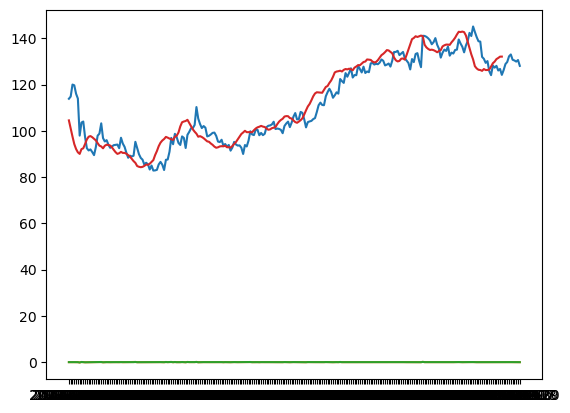

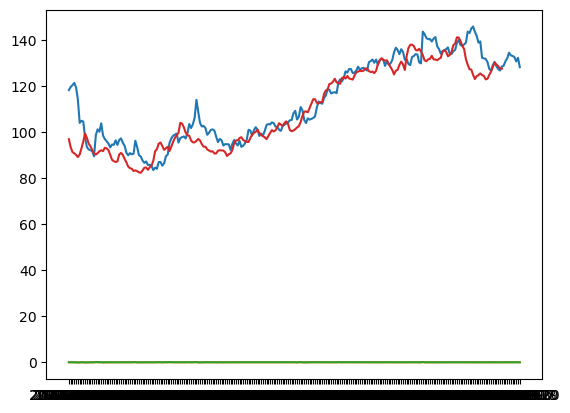

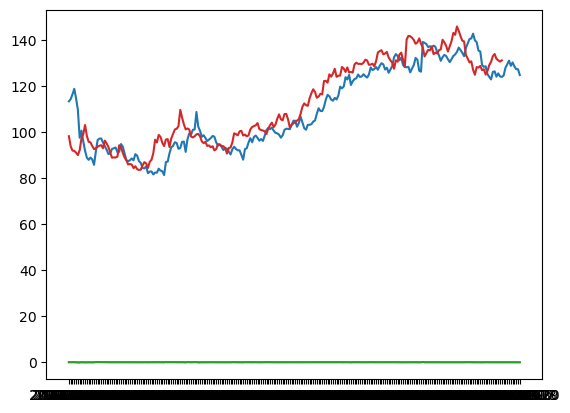

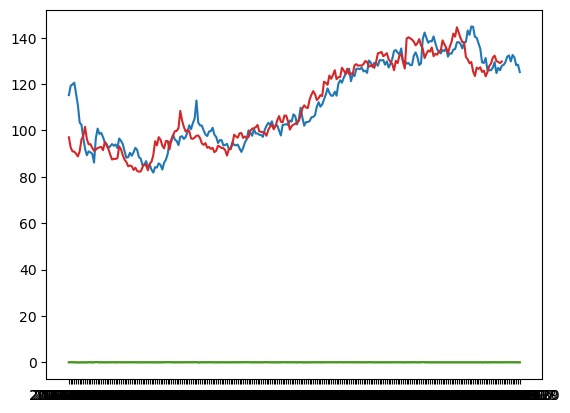

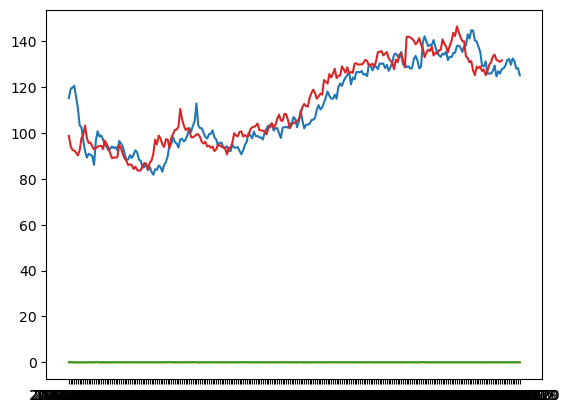

In [47]:
#plotting data individually for each feature
for i in range(0,5):
    plt.plot(df[i].iloc[split:])
    plt.plot(test_predict[i])
    plt.show()
